# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [27]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [32]:
import pandas as pd
df = pd.read_csv('/content/Traffic Data.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [34]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

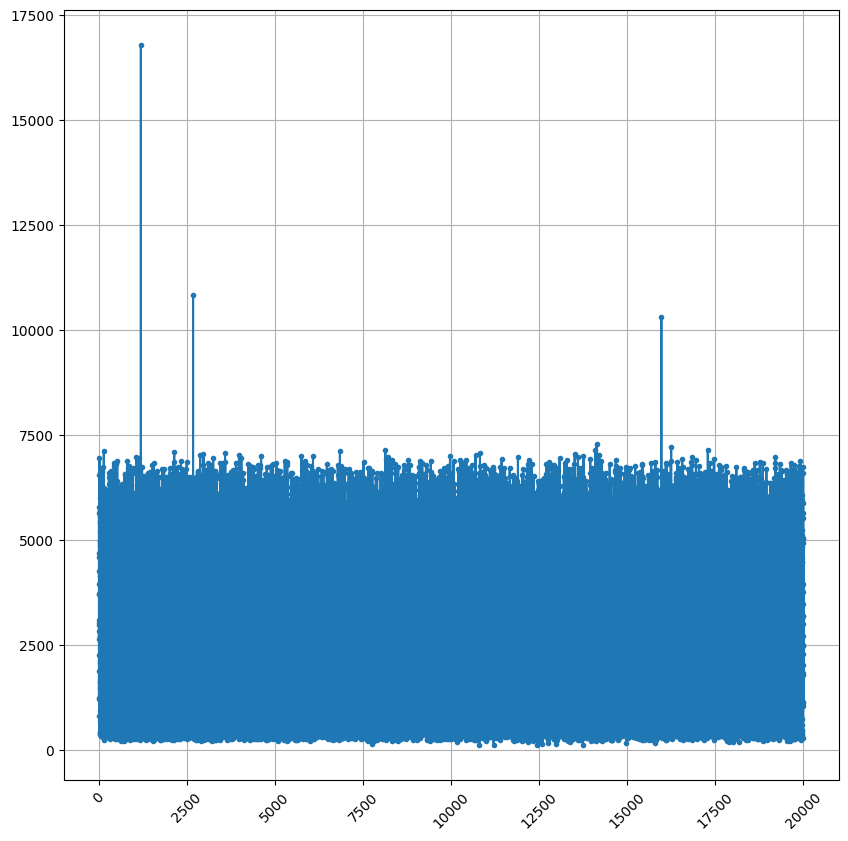

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(df.index,df['traffic_volume'], marker='.')
plt.xticks(rotation=45)
plt.grid(True)

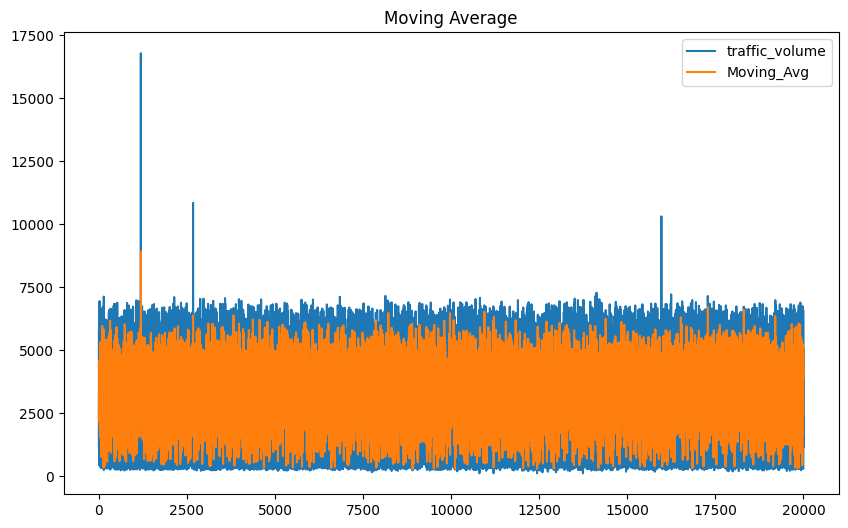

In [38]:
df['Moving_Avg']=df['traffic_volume'].rolling(window=3).mean()
df[['traffic_volume','Moving_Avg']].plot(figsize=(10,6))
plt.title('Moving Average')
plt.show()


In [21]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(df['traffic_volume'], model='additive')
#decomposition.plot()
#plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
 8   Moving_Avg           19938 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.4+ MB


In [40]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
Moving_Avg,62


In [41]:
#df.drop('Moving Average',axis=1,inplace=True)

In [42]:
df.drop('Moving_Avg',axis=1,inplace=True)

In [44]:
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)


In [45]:
df.isnull().sum()#Because I RUN more than once and got engaged

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


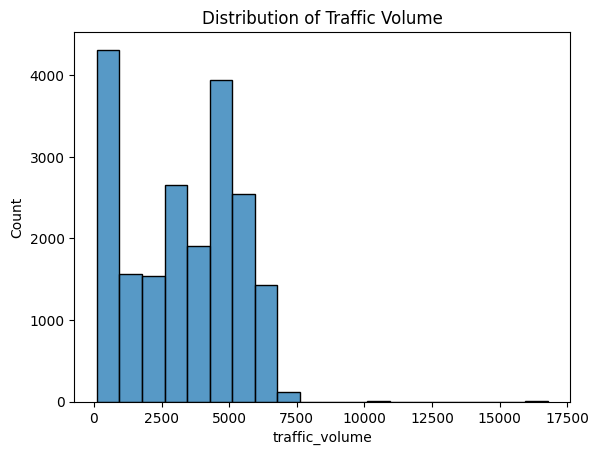

In [46]:
import seaborn as sns
sns.histplot(df['traffic_volume'], bins=20)
plt.title('Distribution of Traffic Volume')
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [47]:
lags = []
for i in range(1, 6):
    df[f'Lag_{i}'] = df['traffic_volume'].shift(i)
    lags.append(f'Lag_{i}')
df.dropna(inplace=True)

In [48]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
5,4257.0,293.66,0.0,0.0,75,Rain,moderate rain,2018-06-09 12:00:00,5794.0,2838.0,4602.0,1248.0,1209.0
6,3707.0,292.75,0.0,0.0,40,Rain,proximity shower rain,2018-07-26 19:00:00,4257.0,5794.0,2838.0,4602.0,1248.0
7,5646.0,299.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,2018-08-03 15:00:00,3707.0,4257.0,5794.0,2838.0,4602.0
8,2642.0,275.29,0.0,0.0,90,Fog,fog,2018-01-10 20:00:00,5646.0,3707.0,4257.0,5794.0,2838.0
9,801.0,296.43,0.0,0.0,1,Clear,sky is clear,2018-08-09 00:00:00,2642.0,5646.0,3707.0,4257.0,5794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,288.0,1833.0,5022.0,3001.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,6601.0,288.0,1833.0,5022.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,2723.0,6601.0,288.0,1833.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,5895.0,2723.0,6601.0,288.0


In [49]:
df.index = pd.to_datetime(df.index)#Here I converted the index to index.


In [50]:
df['Day_of_the_week']= df.index.day_of_week
df['Month'] = df.index.month
df['Day_of_the_year'] = df.index.day_of_year


In [51]:
df.isna().sum()
df.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Day_of_the_week,Month,Day_of_the_year
1970-01-01 00:00:00.000000005,4257.0,293.66,0.0,0.0,75,Rain,moderate rain,2018-06-09 12:00:00,5794.0,2838.0,4602.0,1248.0,1209.0,3,1,1
1970-01-01 00:00:00.000000006,3707.0,292.75,0.0,0.0,40,Rain,proximity shower rain,2018-07-26 19:00:00,4257.0,5794.0,2838.0,4602.0,1248.0,3,1,1
1970-01-01 00:00:00.000000007,5646.0,299.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,2018-08-03 15:00:00,3707.0,4257.0,5794.0,2838.0,4602.0,3,1,1
1970-01-01 00:00:00.000000008,2642.0,275.29,0.0,0.0,90,Fog,fog,2018-01-10 20:00:00,5646.0,3707.0,4257.0,5794.0,2838.0,3,1,1
1970-01-01 00:00:00.000000009,801.0,296.43,0.0,0.0,1,Clear,sky is clear,2018-08-09 00:00:00,2642.0,5646.0,3707.0,4257.0,5794.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000019995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,288.0,1833.0,5022.0,3001.0,3,1,1
1970-01-01 00:00:00.000019996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,6601.0,288.0,1833.0,5022.0,3,1,1
1970-01-01 00:00:00.000019997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,2723.0,6601.0,288.0,1833.0,3,1,1
1970-01-01 00:00:00.000019998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,5895.0,2723.0,6601.0,288.0,3,1,1


In [54]:
X = df.drop(columns=['traffic_volume'])
y = df['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [55]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Day_of_the_week,Month,Day_of_the_year
1970-01-01 00:00:00.000000005,4257.0,293.66,0.0,0.0,75,Rain,moderate rain,2018-06-09 12:00:00,5794.0,2838.0,4602.0,1248.0,1209.0,3,1,1
1970-01-01 00:00:00.000000006,3707.0,292.75,0.0,0.0,40,Rain,proximity shower rain,2018-07-26 19:00:00,4257.0,5794.0,2838.0,4602.0,1248.0,3,1,1
1970-01-01 00:00:00.000000007,5646.0,299.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,2018-08-03 15:00:00,3707.0,4257.0,5794.0,2838.0,4602.0,3,1,1
1970-01-01 00:00:00.000000008,2642.0,275.29,0.0,0.0,90,Fog,fog,2018-01-10 20:00:00,5646.0,3707.0,4257.0,5794.0,2838.0,3,1,1
1970-01-01 00:00:00.000000009,801.0,296.43,0.0,0.0,1,Clear,sky is clear,2018-08-09 00:00:00,2642.0,5646.0,3707.0,4257.0,5794.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000019995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,288.0,1833.0,5022.0,3001.0,3,1,1
1970-01-01 00:00:00.000019996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,6601.0,288.0,1833.0,5022.0,3,1,1
1970-01-01 00:00:00.000019997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,2723.0,6601.0,288.0,1833.0,3,1,1
1970-01-01 00:00:00.000019998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,5895.0,2723.0,6601.0,288.0,3,1,1


In [56]:
y

,traffic_volume
1970-01-01 00:00:00.000000005,4257.0
1970-01-01 00:00:00.000000006,3707.0
1970-01-01 00:00:00.000000007,5646.0
1970-01-01 00:00:00.000000008,2642.0
1970-01-01 00:00:00.000000009,801.0
...,...
1970-01-01 00:00:00.000019995,2723.0
1970-01-01 00:00:00.000019996,5895.0
1970-01-01 00:00:00.000019997,1132.0
1970-01-01 00:00:00.000019998,5525.0


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [57]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [58]:
print("Training data types:")
print(X_train.dtypes)

print("Testing data types:")
print(X_test.dtypes)


Training data types:
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
Lag_1                  float64
Lag_2                  float64
Lag_3                  float64
Lag_4                  float64
Lag_5                  float64
Day_of_the_week          int32
Month                    int32
Day_of_the_year          int32
dtype: object
Testing data types:
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
Lag_1                  float64
Lag_2                  float64
Lag_3                  float64
Lag_4                  float64
Lag_5                  float64
Day_of_the_week          int32
Month                    int32
Day_of_the_year          int32
dtype: object


In [59]:
for df in [X_train, X_test]:
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['Year'] = df['date_time'].dt.year
    df['Month'] = df['date_time'].dt.month
    df['Day'] = df['date_time'].dt.day
    df['Hour'] = df['date_time'].dt.hour
    df['Minute'] = df['date_time'].dt.minute
    df.drop('date_time', axis=1, inplace=True)
    #date_time is converted to datetime type

In [60]:
# Check columns of X_train and X_test
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


X_train columns: Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
       'Day_of_the_week', 'Month', 'Day_of_the_year', 'Year', 'Day', 'Hour',
       'Minute'],
      dtype='object')
X_test columns: Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
       'Day_of_the_week', 'Month', 'Day_of_the_year', 'Year', 'Day', 'Hour',
       'Minute'],
      dtype='object')


In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['weather_main'] = le.fit_transform(X_train['weather_main'])
X_test['weather_main'] = le.transform(X_test['weather_main'])


In [62]:
print(X_train.dtypes)
print(X_test.dtypes)


temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main             int64
weather_description     object
Lag_1                  float64
Lag_2                  float64
Lag_3                  float64
Lag_4                  float64
Lag_5                  float64
Day_of_the_week          int32
Month                    int32
Day_of_the_year          int32
Year                     int32
Day                      int32
Hour                     int32
Minute                   int32
dtype: object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main             int64
weather_description     object
Lag_1                  float64
Lag_2                  float64
Lag_3                  float64
Lag_4                  float64
Lag_5                  float64
Day_of_the_week          int32
Month                    int32
Day_of_the_year          

In [63]:

X_train = X_train.drop(columns=['weather_description'])
X_test = X_test.drop(columns=['weather_description'])


In [64]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [65]:
!pip install pmdarima

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [66]:
from pmdarima import auto_arima

In [67]:
df.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
       'Day_of_the_week', 'Month', 'Day_of_the_year', 'Year', 'Day', 'Hour',
       'Minute'],
      dtype='object')

In [68]:
df.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Day_of_the_week,Month,Day_of_the_year,Year,Day,Hour,Minute
1970-01-01 00:00:00.000016001,283.15,0.0,0.0,90,2,light intensity drizzle,3503.0,1495.0,4624.0,3307.0,5916.0,3,5,1,2017,21,13,0
1970-01-01 00:00:00.000016002,286.48,0.0,0.0,1,0,sky is clear,4461.0,3503.0,1495.0,4624.0,3307.0,3,5,1,2017,25,9,0
1970-01-01 00:00:00.000016003,298.72,0.0,0.0,75,1,broken clouds,5251.0,4461.0,3503.0,1495.0,4624.0,3,9,1,2017,10,17,0
1970-01-01 00:00:00.000016004,302.90,0.0,0.0,40,1,scattered clouds,3877.0,5251.0,4461.0,3503.0,1495.0,3,9,1,2017,23,15,0
1970-01-01 00:00:00.000016005,253.95,0.0,0.0,90,8,light snow,4473.0,3877.0,5251.0,4461.0,3503.0,3,1,1,2017,5,3,0


In [69]:
stepwise_fit = auto_arima(y,
                          start_p=1, start_q=1,
                          max_p=5, max_q=5, m=12,
                          start_P=1, seasonal=True,
                          d=None, D=None, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=137.30 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=360228.081, Time=0.97 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=360231.624, Time=12.43 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=360231.357, Time=6.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=386664.576, Time=0.27 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=360229.883, Time=5.83 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=360229.350, Time=5.43 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=360231.389, Time=66.90 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=360230.052, Time=1.38 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=360230.087, Time=2.56 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=360232.057, Time=4.36 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 243.826 seconds


In [70]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                19995
Model:                        SARIMAX   Log Likelihood             -180112.040
Date:                Sun, 25 Aug 2024   AIC                         360228.081
Time:                        08:31:57   BIC                         360243.887
Sample:                    01-01-1970   HQIC                        360233.252
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3278.2219     14.046    233.384      0.000    3250.691    3305.752
sigma2      3.905e+06   6.13e+04     63.725      0.000    3.79e+06    4.03e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1186.36
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.09
Prob(H) (two-sided):                  0.38   Kurtosis:                         1.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [71]:
n_periods = len(X_test)

In [72]:
y_pred = stepwise_fit.predict(n_periods=n_periods).rename('Predictions')

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: >

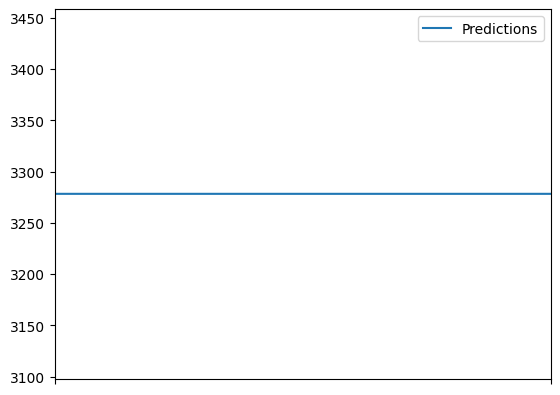

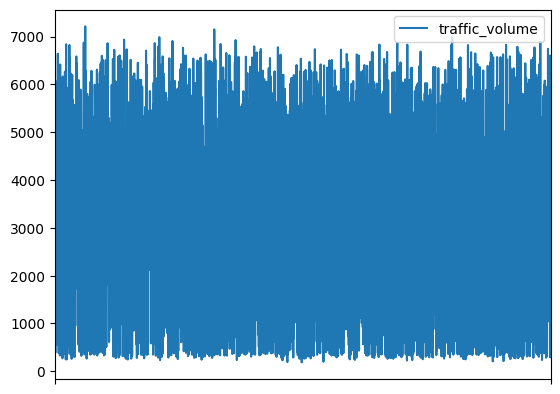

In [73]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

In [74]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


print(mean_squared_error(y_pred,y_test))
print(rmse(y_pred,y_test))

3836316.1802082583
1958.6516229815495


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [75]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Dropout,Input

from keras.callbacks import EarlyStopping

In [76]:
model_rnn = Sequential([
    Input(shape=(X_train.shape[1],1)),
    SimpleRNN(units=25, return_sequences=True),
    Dropout(0.25),

    SimpleRNN(units=25),
    Dropout(0.25),


    # SimpleRNN(units=50, return_sequences=True)
    # Dropout(0.25)

    Dense(units=1)
])

model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 17, 25)              │             675 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,976 (7.72 KB)

 Trainable params: 1,976 (7.72 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [78]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

model_rnn.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=early_stopping)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 14477025.0000 - mean_squared_error: 14477025.0000 - val_loss: 14331261.0000 - val_mean_squared_error: 14331261.0000
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 14431043.0000 - mean_squared_error: 14431043.0000 - val_loss: 14262751.0000 - val_mean_squared_error: 14262751.0000
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 14418680.0000 - mean_squared_error: 14418680.0000 - val_loss: 14195935.0000 - val_mean_squared_error: 14195935.0000
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 14403472.0000 - mean_squared_error: 14403472.0000 - val_loss: 14129925.0000 - val_mean_squared_error: 14129925.0000
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 14052081.0000 - mean_squared_error: 14052081.0000 - val_loss: 14064399.0000 - val_mean_squared_error: 14064399.0000
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 14251480.0000 - mean_squared_error: 14251480.000

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [79]:
y_pred = model_rnn.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: >

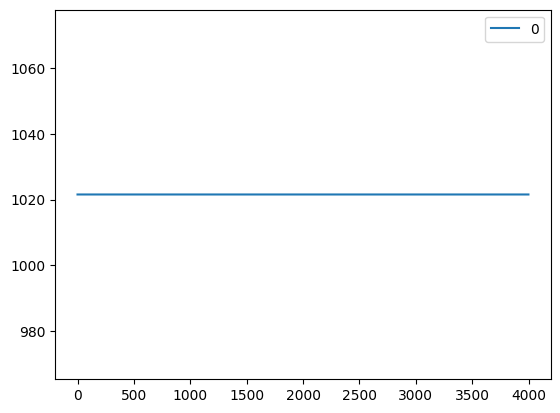

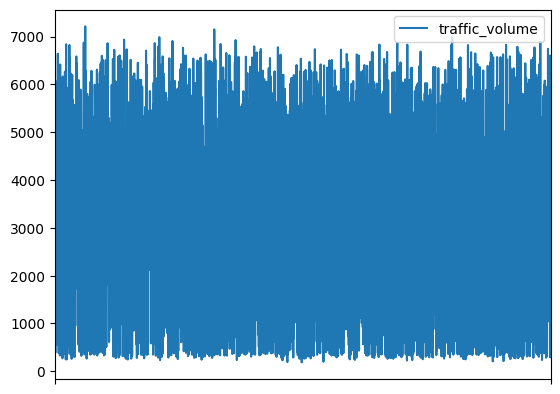

In [80]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: